In [14]:
import cv2
import numpy as np
from PIL import Image
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Prepare Annotation File

[Udacity datasets](https://github.com/udacity/self-driving-car/tree/master/annotations)

**Labels**
- Car
- Truck
- Pedestrian
- Street Lights


**CSV Format**
- frame
- xmin
- ymin
- xmax
- ymax
- occluded
- label
- attributes (Only appears on traffic lights)

**Raw Labels**
```
1478901378140923284.jpg 1524 588 1664 690 1 "car"
1478901378140923284.jpg 1630 576 1856 684 1 "truck"
1478901378140923284.jpg 1796 626 1892 718 1 "car"
1478901378140923284.jpg 1878 550 1914 764 1 "pedestrian"
```


**Input Format**
```
path/to/img1.jpg 50,100,150,200,0 30,50,200,120,3
path/to/img2.jpg 120,300,250,600,2
```

In [2]:
import os
import pandas as pd

In [3]:
dataset_path = './object-dataset'
labels_path = os.path.join(dataset_path, 'labels.csv')

with open(labels_path) as f:
    labels = f.readlines()
    
print(len(labels))
print(labels[:5])

93086
['1478019952686311006.jpg 950 574 1004 620 0 "car"\n', '1478019952686311006.jpg 1748 482 1818 744 0 "pedestrian"\n', '1478019953180167674.jpg 872 586 926 632 0 "car"\n', '1478019953689774621.jpg 686 566 728 618 1 "truck"\n', '1478019953689774621.jpg 716 578 764 622 0 "car"\n']


In [4]:
label = '1478019953689774621.jpg 686 566 728 618 1 "truck"\n'
temp = label.split()
for i, t in enumerate(temp):
    print('idx: {}, value: {}'.format(i, t))

idx: 0, value: 1478019953689774621.jpg
idx: 1, value: 686
idx: 2, value: 566
idx: 3, value: 728
idx: 4, value: 618
idx: 5, value: 1
idx: 6, value: "truck"


In [5]:
def prepare_annotations(dataset_path):
    labels_path = os.path.join(dataset_path, 'labels.csv')
    
    with open(labels_path) as f:
        labels = f.readlines()
        
    imgs = []
    xmin = []
    ymin = []
    xmax = []
    ymax = []
    kind = []
    
    for label in labels:
        temp = label.split()
        imgs.append(os.path.join(dataset_path, temp[0]))
        xmin.append(temp[1])
        ymin.append(temp[2])
        xmax.append(temp[3])
        ymax.append(temp[4])
        kind.append(temp[6])
        
    assert len(imgs) == len(xmin) == len(ymin) == len(xmax) == len(ymax) == len(kind)
    
    return imgs, xmin, ymin, xmax, ymax, kind

# Create a dataframe
dataset_path = './object-dataset'
imgs, xmin, ymin, xmax, ymax, kind = prepare_annotations(dataset_path)
df = pd.DataFrame({'image': imgs, 'x_min': xmin, 'y_min': ymin, 'x_max': xmax, 'y_max': ymax, 'class': kind})

# Convert class values to Caterogical type
df['class'] = pd.Categorical(df['class'])
df['category'] = df['class'].cat.codes

print('Mapping: ', dict(enumerate(df['class'].cat.categories)))

cols = ['image', 'x_min', 'y_min', 'x_max', 'y_max', 'category', 'class']
df = df[cols]
df.sample(10).head(3)

Mapping:  {0: '"biker"', 1: '"car"', 2: '"pedestrian"', 3: '"trafficLight"', 4: '"truck"'}


,image,x_min,y_min,x_max,y_max,category,class
30408,/home/ankoor/misc/detect/object-dataset/147873...,1300,514,1782,818,1,"""car"""
14043,/home/ankoor/misc/detect/object-dataset/147873...,846,568,894,620,1,"""car"""
13078,/home/ankoor/misc/detect/object-dataset/147802...,1166,570,1300,666,1,"""car"""


In [6]:
def write_annotation_file(file_path, df):
    with open(file_path, 'w') as f:
        for k, v in df.groupby('image'):
            v = np.array(v)
            out_str = k
            for i in range(len(v)):
                xmin = v[i][1]
                ymin = v[i][2]
                xmax = v[i][3]
                ymax = v[i][4]
                kind = v[i][5]
                bboxes_str = " {},{},{},{},{}".format(xmin, ymin, xmax, ymax, kind)
                out_str += bboxes_str
            f.write(out_str + '\n')
            
file_path = './annotations.csv'
write_annotation_file(file_path, df)

In [7]:
print(df['class'].nunique())
classes = df['class'].unique()
print(classes)

for c in classes:
    print(c, df[df['class'] == c].shape[0])

5
["car", "pedestrian", "truck", "trafficLight", "biker"]
Categories (5, object): ["car", "pedestrian", "truck", "trafficLight", "biker"]
"car" 60788
"pedestrian" 9866
"truck" 3503
"trafficLight" 17253
"biker" 1676


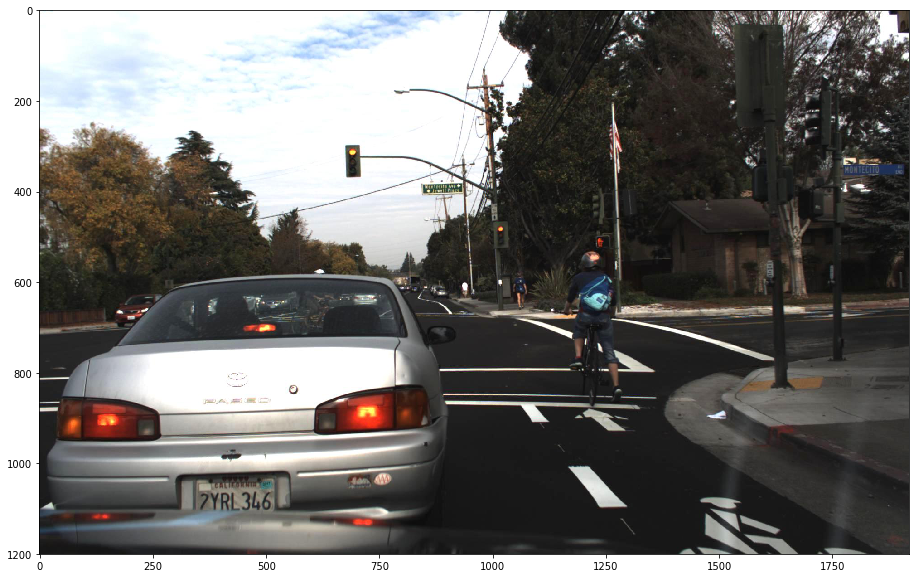

In [8]:
bikers = df[df['class'] == '"biker"']['image'].tolist()
plt.figure(figsize=(20,10))
plt.imshow(Image.open(np.random.choice(bikers)))

In [9]:
t = pd.DataFrame({'a': [1, 1, 2, 2, 2], 'b': np.random.randn(5), 'c': np.random.randint(0, 9, size=5)})
for k, v in t.groupby('a'):
    v = np.array(v)
    print(k)
    print(v.shape)
    print(len(v))
    print('---')

1
(2, 3)
2
---
2
(3, 3)
3
---


In [444]:
a = np.random.randint(0, 9, size=(3, 6))
print(a)
print(len(a))
print()

for i in range(len(a)):
    print(a[i][0])

[[3 1 5 3 4 4]
 [5 0 2 1 8 5]
 [4 7 1 0 0 1]]
3

3
5
4


In [472]:
img = './object-dataset/1478019955679801306.jpg'
df[df['image'] == img]

,image,x_min,y_min,x_max,y_max,category,class
21,/home/ankoor/misc/detect/object-dataset/147801...,594,572,650,624,1,"""car"""
22,/home/ankoor/misc/detect/object-dataset/147801...,598,554,664,612,4,"""truck"""
23,/home/ankoor/misc/detect/object-dataset/147801...,738,568,792,614,1,"""car"""


# Data Augmentations

In [136]:
def draw_box(img, coords):
    """
    Function to draw bounding boxes on image.
    """
    img = img.copy()
    coords = coords.reshape(-1, 5)
    coords = coords.astype(int)
    for coord in coords:
        ul_pt = (int(coord[0]), int(coord[1]))  # Upper left point
        br_pt = (int(coord[2]), int(coord[3]))  # Bottom right point
        color = [0, 255, 0]        
        img = cv2.rectangle(img.copy(), ul_pt, br_pt, color, 
                            int(max(img.shape[:2])/200))
    return img

def rand(a=0, b=1):
    return np.random.rand() * (b-a) + a

def bbox_area(bbox):
    return (bbox[:,2] - bbox[:,0])*(bbox[:,3] - bbox[:,1])

def clip_box(bbox, clip_box, alpha=None):
    """Clip the bounding boxes to the borders of an image.
    bbox: numpy.ndarray. Numpy array containing bounding boxes of shape N X 4 where N is the 
        number of bounding boxes and the bounding boxes are represented in the format x1 y1 x2 y2
    clip_box: numpy.ndarray. An array of shape (4,) specifying the diagonal co-ordinates of the image.
        The coordinates are represented in the format x1 y1 x2 y2
    alpha: float
        If the fraction of a bounding box left in the image after being clipped is less than alpha the 
        bounding box is dropped.     
    """
    ar_ = (bbox_area(bbox))
    x_min = np.maximum(bbox[:, 0], clip_box[0]).reshape(-1, 1)
    y_min = np.maximum(bbox[:, 1], clip_box[1]).reshape(-1, 1)
    x_max = np.minimum(bbox[:, 2], clip_box[2]).reshape(-1, 1)
    y_max = np.minimum(bbox[:, 3], clip_box[3]).reshape(-1, 1)

    bbox = np.hstack((x_min, y_min, x_max, y_max, bbox[:, 4:]))

    if alpha:
        delta_area = ((ar_ - bbox_area(bbox)) / ar_)
        mask = (delta_area < (1 - alpha)).astype(int)
        bbox = bbox[mask == 1, :]

    return bbox

def horizontal_flip(img, bboxes):
    bboxes = bboxes.copy()
    img_center = np.array(img.shape[:2])[::-1] / 2
    img_center = np.hstack((img_center, img_center))
    img = img[:, ::-1, :]
    bboxes[:, [0, 2]] = bboxes[:, [0, 2]] + 2 * (img_center[[0, 2]] - bboxes[:, [0, 2]])
    box_w = abs(bboxes[:, 0] - bboxes[:, 2])
    bboxes[:, 0] -= box_w
    bboxes[:, 2] += box_w
    return bboxes.clip(min=0)
    
def get_random_augmented_data(annotation_line, input_shape, random=True, max_boxes=25, jitter=0.2,
                              hue=0.1, saturation=1.5, value=1.5, proc_image=True):
    """
    Random preprocessing for real-time data augmentation. The augmentations that can be applied 
    randomly are: (1) Resize; (2) Horizontal flip; and (3) HSV distortions.
    
    Reference: https://github.com/qqwweee/keras-yolo3/blob/master/yolo3/utils.py
    
    Parameters
    ----------
    annotation_line: str
    input_shape: tuple
    random: bool, 
    max_boxes: int
    jitter: float
    hue: float
    saturation: float
    value: float
    proc_image: bool
    """
    # Extract data from annotation string
    line = annotation_line.split()
    
    # Bounding boxes, size: [num_boxes, 5]
    bbox = np.array([np.array(list(map(int, box.split(',')))) for box in line[1:]])
    
    # Read image
    image = Image.open(line[0])
    img_w, img_h = image.size
    
    # Model input shape
    h, w = input_shape
    
    # No random augmentations
    if not random:
        
        # Get scale for image/box resizing
        scale = min(w/img_w, h/img_h)
        
        # Compute new width and height of image
        new_img_w = int(img_w * scale)
        new_img_h = int(img_h * scale)
        
        # Compute upper left corner coordinates for pasting image
        dx = (w - new_img_w)//2
        dy = (h - new_img_h)//2
        
        if proc_image:
            # Resize image while keeping original aspect ratio
            image = image.resize(size=(new_img_w, new_img_h), resample=Image.BICUBIC)
            new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))
            new_image.paste(im=image, box=(dx, dy))
            image = np.array(new_image)/255.0  # RGB values in range [0, 1]
            
        # Correct bounding boxes to new image size
        bboxes = np.zeros((max_boxes, 5))
        
        if len(bbox) > 0:
            # Shuffle the boxes
            np.random.shuffle(bbox)

            if len(bbox) > max_boxes:
                bbox = bbox[:max_boxes]

            # Scale the boxes to account for resized image
            bbox[:, [0, 2]] = bbox[:, [0, 2]] * scale + dx # x_min and x_max
            bbox[:, [1, 3]] = bbox[:, [1, 3]] * scale + dy # y_min and y_max
            bboxes[:len(bbox)] = bbox
            
        return image, bboxes
    
    # Random augmentations
    
    # Randomly resize image
    new_ar = w/h * rand(1-jitter, 1+jitter)/rand(1-jitter, 1+jitter)
    
    scale = rand(0.75, 2.0)  

    if new_ar < 1:
        new_h = int(scale * h)
        new_w = int(new_h * new_ar)
    else:
        new_w = int(scale * w)
        new_h = int(new_w / new_ar)
    
    # Resize image
    image = image.resize(size=(new_w, new_h), resample=Image.BICUBIC)
    
    # Compute upper left corner coordinates for pasting image
    dx = int(rand(0, w - new_w))
    dy = int(rand(0, h - new_h))

    # Create a canvas 
    new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))

    # Paste resized image on canvas
    new_image.paste(im=image, box=(dx, dy))
    image = new_image

    # Randomly flip images horizontally
    flip = rand() < 0.5
    
    if flip:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Distort images
    hue = rand(-hue, hue)
    saturation = rand(1, saturation) if rand() < 0.5 else 1/rand(1, saturation)
    value = rand(1, value) if rand() < 0.5 else 1/rand(1, value)

    # Convert RGB to HSV
    hsv_img = rgb_to_hsv(np.array(image)/255.0) # Values must be in the range [0, 1]
    hsv_img[..., 0] += hue
    hsv_img[..., 0][hsv_img[..., 0] > 1] -= 1
    hsv_img[..., 0][hsv_img[..., 0] < 0] += 1
    hsv_img[..., 1] *= saturation
    hsv_img[..., 2] *= value
    hsv_img[hsv_img > 1] = 1
    hsv_img[hsv_img < 0] = 0
    image = hsv_to_rgb(hsv_img) # RGB values in range [0, 1]
    
    # Correct bounding boxes to reflect scale and horizontal flip augmentations
    bboxes = np.zeros((max_boxes, 5))

    if len(bbox) > 0:
        # Shuffle the boxes
        np.random.shuffle(bbox)

        # Rescale boxes
        bbox[:, [0, 2]] = bbox[:, [0, 2]] * new_w/img_w + dx
        bbox[:, [1, 3]] = bbox[:, [1, 3]] * new_h/img_h + dy

        # Flip boxes if image was horizontally flipped
        if flip:
            bbox = horizontal_flip(img=image, bboxes=bbox)

        bbox[:, [0, 2]][bbox[:, [0, 2]] < 0] = 0
        bbox[:, 2][bbox[:, 2] > w] = w
        bbox[:, 3][bbox[:, 3] > h] = h
        bbox_w = bbox[:, 2] - bbox[:, 0]
        bbox_h = bbox[:, 3] - bbox[:, 1]

        # Discard invalid boxes
        bbox = bbox[np.logical_and(bbox_w > 1, bbox_h > 1)]

        if len(bbox) > max_boxes:
            bbox = bbox[:max_boxes]
            
        bbox = clip_box(bbox, [0, 0, h, w], alpha=0.25)
        bboxes[:len(bbox)] = bbox
    
    return image, bboxes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[241. 188. 246. 212.   2.]
 [147. 149. 152. 164.   3.]
 [197. 193. 209. 214.   1.]
 [155. 196. 161. 208.   1.]
 [ 52. 158.  58. 173.   3.]
 [147. 153. 152. 173.   3.]
 [ 71. 191.  79. 215.   0.]
 [ 69. 189.  81. 206.   0.]
 [166. 195. 175. 206.   1.]
 [227. 152. 232. 172.   3.]
 [154. 194. 163. 208.   1.]
 [122. 185. 155. 223.   1.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


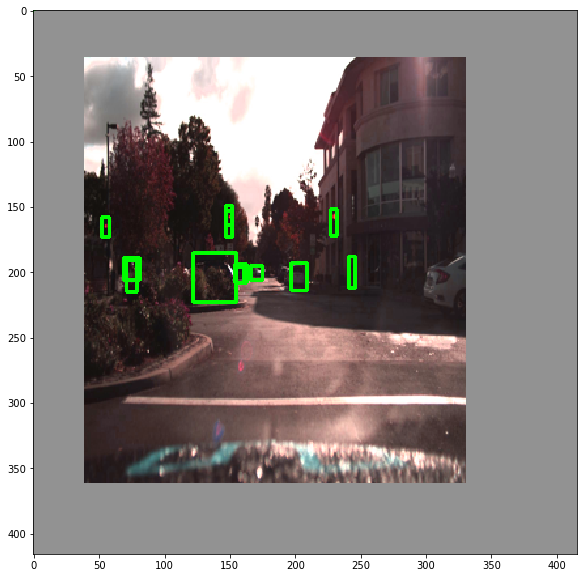

In [138]:
# Check
annotation_line = './example2.jpg 50,100,150,200,0 30,50,200,120,3'
annotation_line = './object-dataset/1478020282699635345.jpg 92,450,128,506,3 200,566,280,628,0 216,572,264,660,0 552,552,766,692,1 712,432,748,506,3 716,416,746,474,3 760,584,816,634,1 764,592,808,634,1 838,588,900,626,1 1044,578,1118,658,1 1240,428,1274,502,3 1334,562,1366,648,2'

# I = './object-dataset/1478899999620519617.jpg '
# B = '696,666,746,706,1 716,364,778,492,0 952,520,996,612,0 1158,630,1200,730,2 '
# BB = '1320,620,1366,722,2 1542,594,1748,714,1 1774,414,1918,1170,3 1792,470,1914,1174,3'
# IB = I + B + BB
# annotation_line = IB

input_shape = (416, 416)

img, bbox = get_random_augmented_data(annotation_line, input_shape, random=True)

plt.figure(figsize=(20,10))
plt.imshow(draw_box(img, bbox))
#plt.imshow(img)
print(bbox)

In [139]:
img

array([[[0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        ...,
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725]],

       [[0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        ...,
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725]],

       [[0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        ...,
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725]],

       ...,

       [[0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0.57438725, 0.57438725],
        [0.57438725, 0

### Scratch

In [310]:
annotation_line = './example2.jpg 50,100,150,200,0 30,50,200,120,3'
input_shape = (416, 416)
max_boxes = 25
jitter = 0.15
hue = 0.1
saturation = 1.5
value = 1.5

In [311]:
line = annotation_line.split()
print(line)

['./example2.jpg', '50,100,150,200,0', '30,50,200,120,3']


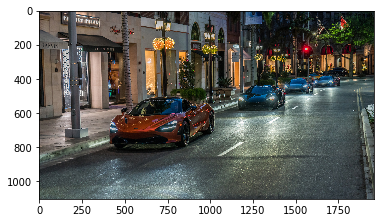

In [312]:
image = Image.open(line[0])
plt.imshow(image)

In [313]:
print(image.size)
img_w, img_h = image.size

# Model input shape
h, w = input_shape

(1960, 1102)


In [314]:
# Bounding boxes, size: [num_boxes, 5]
bbox = np.array([np.array(list(map(int, box.split(',')))) for box in line[1:]])
print(bbox)

[[ 50 100 150 200   0]
 [ 30  50 200 120   3]]


0.21224489795918366
416 233
0 91
(416, 233)
(416, 416)
(416, 416)
(25, 5)
(25, 5)


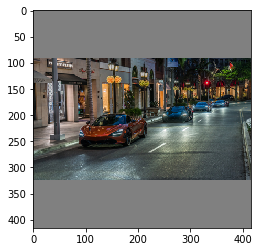

In [315]:
# If random = False
scale = min(w/img_w, h/img_h)
print(scale)

new_img_w = int(img_w * scale)
new_img_h = int(img_h * scale)
print(new_img_w, new_img_h)

dx = (w - new_img_w)//2
dy = (h - new_img_h)//2
print(dx, dy)

# If proc_image = True
image = image.resize(size=(new_img_w, new_img_h), resample=Image.BICUBIC)
print(image.size)

new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))
print(new_image.size)

new_image.paste(im=image, box=(dx, dy))
print(new_image.size)
plt.imshow(new_image)

# Correct bounding boxes to new image size
bboxes = np.zeros((max_boxes, 5))
print(bboxes.shape)

if len(bbox) > 0:
    # Shuffle the boxes
    np.random.shuffle(bbox)
    
    if len(bbox) > max_boxes:
        bbox = bbox[:max_boxes]
        
    # Scale the boxes to account for resized image
    bbox[:, [0, 2]] = bbox[:, [0, 2]] * scale + dx # x_min and x_max
    bbox[:, [1, 3]] = bbox[:, [1, 3]] * scale + dy # y_min and y_max
    bboxes[:len(bbox)] = bbox
    
print(bboxes.shape)

1.1991949453520105
1.740705225929891
603 724
(724, 603)
-81 -123
(416, 416)
(416, 416)
False
1.3884176303592417e-05 1.0277430480460368 1.0698199951947276
[[-62. -68. -25. -13.   0.]
 [-69. -95.  -7. -57.   3.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


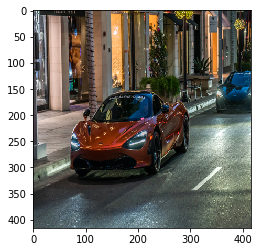

In [330]:
image = Image.open(line[0])
bbox = np.array([np.array(list(map(int, box.split(',')))) for box in line[1:]])
img_w, img_h = image.size

# If random = True

# Randomly scale image
new_ar = w/h * rand(1-jitter, 1+jitter)/rand(1-jitter, 1+jitter)
print(new_ar)

scale = rand(0.75, 1.75)  
print(scale)

if new_ar < 1:
    new_h = int(scale * h)
    new_w = int(new_h * new_ar)
else:
    new_w = int(scale * w)
    new_h = int(new_w / new_ar)
    
print(new_h, new_w)

image = image.resize(size=(new_w, new_h), resample=Image.BICUBIC)
print(image.size)

# Paste image on grey canvas
dx = int(rand(0, w - new_w))
dy = int(rand(0, h - new_h))
print(dx, dy)

# Create a canvas 
new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))
print(new_image.size)

# Paste resized image on canvas
new_image.paste(im=image, box=(dx, dy))
print(new_image.size)

image = new_image

# Randomly flip images horizontally
flip = rand() < 0.5
print(flip)

if flip: 
    image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
# Distort images
hue = rand(-hue, hue)
saturation = rand(1, saturation) if rand() < 0.5 else 1/rand(1, saturation)
value = rand(1, value) if rand() < 0.5 else 1/rand(1, value)
print(hue, saturation, value)

# Convert RGB to HSV
hsv_img = rgb_to_hsv(np.array(image)/255.0) # Values must be in the range [0, 1]
hsv_img[..., 0] += hue
hsv_img[..., 0][hsv_img[..., 0] > 1] -= 1
hsv_img[..., 0][hsv_img[..., 0] < 0] += 1
hsv_img[..., 1] *= saturation
hsv_img[..., 2] *= value
hsv_img[hsv_img > 1] = 1
hsv_img[hsv_img < 0] = 0
rgb_img = hsv_to_rgb(hsv_img) * 255 # RGB values in range [0, 1] * 255
image = rgb_img.astype('uint8')

plt.imshow(image)

# Correct bounding boxes to reflect scale and horizontal flip augmentations
bboxes = np.zeros((max_boxes, 5))

if len(bbox) > 0:
    # Shuffle the boxes
    np.random.shuffle(bbox)
    
    # Rescale boxes
    bbox[:, [0, 2]] = bbox[:, [0, 2]] * new_w/img_w + dx
    bbox[:, [1, 3]] = bbox[:, [1, 3]] * new_h/img_h + dy
    
    # Flip boxes if image was horizontally flipped
    if flip:
        bbox[:, [0, 2]] = w - bbox[:, [0, 2]]
    
    bbox[:, [0, 2]][bbox[:, [0, 2]] < 0] = 0
    bbox[:, 2][bbox[:, 2] > w] = w
    bbox[:, 3][bbox[:, 3] > h] = h
    bbox_w = bbox[:, 2] - bbox[:, 0]
    bbox_h = bbox[:, 3] - bbox[:, 1]
    
    # Discard invalid boxes
    bbox = bbox[np.logical_and(bbox_w > 1, bbox_h > 1)]
    
    if len(bbox) > max_boxes:
        bbox = bbox[:max_boxes]
        
    bboxes[:len(bbox)] = bbox
    
print(bboxes)


In [317]:
print(bbox)

[]


In [318]:
print(w)

416


In [319]:
bbox[:, [0, 2]] = w - bbox[:, [0, 2]]
print(bbox)

[]


In [320]:
bbox[:, [0, 2]][bbox[:, [0, 2]] < 0] = 0
print(bbox)

[]


In [321]:
bbox[:, 2][bbox[:, 2] > w] = w
print(bbox)

[]


In [322]:
bbox[:, 3][bbox[:, 3] > h] = h
print(bbox)

[]


In [323]:
bbox_w = bbox[:, 2] - bbox[:, 0]
print(bbox_w)

[]


In [324]:
bbox_h = bbox[:, 3] - bbox[:, 1]
print(bbox_h)

[]


In [325]:
bbox = bbox[np.logical_and(bbox_w > 1, bbox_h > 1)]
print(bbox)

[]


In [326]:
if len(bbox) > max_boxes:
    bbox = bbox[:max_boxes]
    
print(bbox)

[]


In [327]:
bboxes[:len(bbox)] = bbox
print(bboxes)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
def draw_box(img, coords):
    """
    Function to draw bounding boxes on image.
    """
    img = img.copy()
    coords = coords.reshape(-1, 5)
    coords = coords.astype(int)
    for coord in coords:
        ul_pt = (int(coord[0]), int(coord[1]))  # Upper left point
        br_pt = (int(coord[2]), int(coord[3]))  # Bottom right point
        color = [0, 255, 0]        
        img = cv2.rectangle(img.copy(), ul_pt, br_pt, color, 
                            int(max(img.shape[:2])/200))
    return img

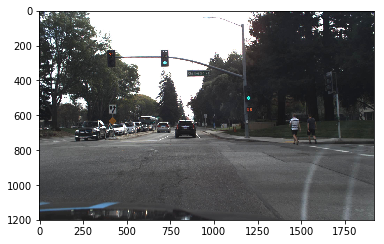

In [140]:
path = './object-dataset/1478898986150955100.jpg'
image = Image.open(path)
plt.imshow(image)

# Updating Data Augmentation Function (remove scale)

In [218]:
def horizontal_flip(img, bboxes):
    img = img.copy()
    bboxes = bboxes.copy()
    img_center = np.array(img.shape[:2])[::-1] / 2
    img_center = np.hstack((img_center, img_center))
    img = img[:, ::-1, :]
    bboxes[:, [0, 2]] = bboxes[:, [0, 2]] + 2 * (img_center[[0, 2]] - bboxes[:, [0, 2]])
    box_w = abs(bboxes[:, 0] - bboxes[:, 2])
    bboxes[:, 0] -= box_w
    bboxes[:, 2] += box_w
    return img, bboxes

def get_random_augmented_data(annotation_line, input_shape, augment=True, hue=0.1, saturation=1.5, value=1.5, max_boxes=25):
    """
    Random preprocessing for real-time data augmentation. The augmentations that can be applied 
    randomly are: (1) HSV distortions and (2) Horizontal flip; 
    
    Reference: https://github.com/qqwweee/keras-yolo3/blob/master/yolo3/utils.py
    
    Parameters
    ----------
    annotation_line: str
    input_shape: tuple
    augment: bool, 
    hue: float
    saturation: float
    max_boxes: int
    """
    # Extract data from annotation string
    line = annotation_line.split()
    
    # Bounding boxes, size: [num_boxes, 5]
    bbox = np.array([np.array(list(map(int, box.split(',')))) for box in line[1:]])
    
    # Read image
    image = Image.open(line[0])
    img_w, img_h = image.size
    
    # Model input shape
    h, w = input_shape
    
    # Get scale for image/box resizing
    scale = min(w/img_w, h/img_h)

    # Compute new width and height of image
    new_img_w = int(img_w * scale)
    new_img_h = int(img_h * scale)

    # Compute upper left corner coordinates for pasting image
    dx = (w - new_img_w)//2
    dy = (h - new_img_h)//2
    
    # Resize image while keeping original aspect ratio
    image = image.resize(size=(new_img_w, new_img_h), resample=Image.BICUBIC)
    new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))
    new_image.paste(im=image, box=(dx, dy))
    image = np.array(new_image)
    #image = np.array(new_image)/255.0  # RGB values in range [0, 1]
    
    # Correct bounding boxes to new image size
    bboxes = np.zeros((max_boxes, 5))

    if len(bbox) > 0:
        # Shuffle the boxes
        np.random.shuffle(bbox)
        
        # Scale the boxes to account for resized image
        bbox[:, [0, 2]] = bbox[:, [0, 2]] * scale + dx # x_min and x_max
        bbox[:, [1, 3]] = bbox[:, [1, 3]] * scale + dy # y_min and y_max
        
    # Apply random augmentations
    if augment:
        hue_jitter = rand() < 0.5
        if hue_jitter:
            # Distort images
            hue = rand(-hue, hue)
            saturation = rand(1, saturation) if rand() < 0.5 else 1/rand(1, saturation)
            value = rand(1, value) if rand() < 0.5 else 1/rand(1, value)

            # Convert RGB to HSV
            hsv_img = rgb_to_hsv(np.array(image)/255.0) # Values must be in the range [0, 1]
            hsv_img[..., 0] += hue
            hsv_img[..., 0][hsv_img[..., 0] > 1] -= 1
            hsv_img[..., 0][hsv_img[..., 0] < 0] += 1
            hsv_img[..., 1] *= saturation
            hsv_img[..., 2] *= value
            hsv_img[hsv_img > 1] = 1
            hsv_img[hsv_img < 0] = 0
            image = hsv_to_rgb(hsv_img) # RGB values in range [0, 1]
        
        # Randomly flip images and boxes horizontally
        flip = rand() < 0.5
        if flip:
            image, bbox = horizontal_flip(img=image, bboxes=bbox)
            
    if len(bbox) > max_boxes:
        bbox = bbox[:max_boxes]
    
    bboxes[:len(bbox)] = bbox.clip(min=0)
            
    return image, bboxes

[[388. 179. 414. 332.   3.]
 [286. 212. 295. 234.   2.]
 [155. 156. 168. 184.   0.]
 [150. 222. 161. 230.   1.]
 [384. 167. 415. 331.   3.]
 [206. 190. 215. 210.   0.]
 [334. 206. 378. 232.   1.]
 [250. 214. 260. 236.   2.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


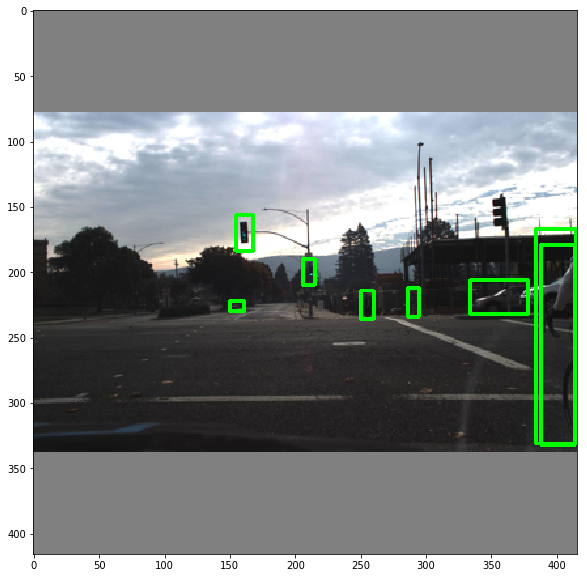

In [227]:
# Check
#annotation_line = './example2.jpg 50,100,150,200,0 30,50,200,120,3'
#annotation_line = './object-dataset/1478020282699635345.jpg 92,450,128,506,3 200,566,280,628,0 216,572,264,660,0 552,552,766,692,1 712,432,748,506,3 716,416,746,474,3 760,584,816,634,1 764,592,808,634,1 838,588,900,626,1 1044,578,1118,658,1 1240,428,1274,502,3 1334,562,1366,648,2'

I = './object-dataset/1478899999620519617.jpg '
B = '696,666,746,706,1 716,364,778,492,0 952,520,996,612,0 1158,630,1200,730,2 '
BB = '1320,620,1366,722,2 1542,594,1748,714,1 1774,414,1918,1170,3 1792,470,1914,1174,3'
IB = I + B + BB
annotation_line = IB

input_shape = (416, 416)

img, bbox = get_random_augmented_data(annotation_line, input_shape, augment=True)

plt.figure(figsize=(20,10))
plt.imshow(draw_box(img, bbox))
#plt.imshow(img)
print(bbox)

In [ ]:
# Old augmentations with scale - NaN issue

def bbox_area(bbox):
    return (bbox[:,2] - bbox[:,0])*(bbox[:,3] - bbox[:,1])

def clip_box(bbox, clip_box, alpha=None):
    """Clip the bounding boxes to the borders of an image.
    bbox: numpy.ndarray. Numpy array containing bounding boxes of shape N X 4 where N is the 
        number of bounding boxes and the bounding boxes are represented in the format x1 y1 x2 y2
    clip_box: numpy.ndarray. An array of shape (4,) specifying the diagonal co-ordinates of the image.
        The coordinates are represented in the format x1 y1 x2 y2
    alpha: float
        If the fraction of a bounding box left in the image after being clipped is less than alpha the 
        bounding box is dropped.     
    """
    ar_ = (bbox_area(bbox))
    x_min = np.maximum(bbox[:, 0], clip_box[0]).reshape(-1, 1)
    y_min = np.maximum(bbox[:, 1], clip_box[1]).reshape(-1, 1)
    x_max = np.minimum(bbox[:, 2], clip_box[2]).reshape(-1, 1)
    y_max = np.minimum(bbox[:, 3], clip_box[3]).reshape(-1, 1)

    bbox = np.hstack((x_min, y_min, x_max, y_max, bbox[:, 4:]))

    if alpha:
        delta_area = ((ar_ - bbox_area(bbox)) / ar_)
        mask = (delta_area < (1 - alpha)).astype(int)
        bbox = bbox[mask == 1, :]

    return bbox

def horizontal_flip(img, bboxes):
    bboxes = bboxes.copy()
    img_center = np.array(img.shape[:2])[::-1] / 2
    img_center = np.hstack((img_center, img_center))
    bboxes[:, [0, 2]] = bboxes[:, [0, 2]] + 2 * (img_center[[0, 2]] - bboxes[:, [0, 2]])
    box_w = abs(bboxes[:, 0] - bboxes[:, 2])
    bboxes[:, 0] -= box_w
    bboxes[:, 2] += box_w
    return bboxes.clip(min=0)
    
def get_random_augmented_data(annotation_line, input_shape, augment=True, max_boxes=25, jitter=0.2,
                              hue=0.1, saturation=1.5, value=1.5, proc_image=True):
    """
    Random preprocessing for real-time data augmentation. The augmentations that can be applied 
    randomly are: (1) Resize; (2) Horizontal flip; and (3) HSV distortions.
    
    Reference: https://github.com/qqwweee/keras-yolo3/blob/master/yolo3/utils.py
    
    Parameters
    ----------
    annotation_line: str
    input_shape: tuple
    random: bool, 
    max_boxes: int
    jitter: float
    hue: float
    saturation: float
    value: float
    proc_image: bool
    """
    # Extract data from annotation string
    line = annotation_line.split()
    
    # Bounding boxes, size: [num_boxes, 5]
    bbox = np.array([np.array(list(map(int, box.split(',')))) for box in line[1:]])
    
    # Read image
    image = Image.open(line[0])
    img_w, img_h = image.size
    
    # Model input shape
    h, w = input_shape
    
    # No random augmentations
    if not augment:
        
        # Get scale for image/box resizing
        scale = min(w/img_w, h/img_h)
        
        # Compute new width and height of image
        new_img_w = int(img_w * scale)
        new_img_h = int(img_h * scale)
        
        # Compute upper left corner coordinates for pasting image
        dx = (w - new_img_w)//2
        dy = (h - new_img_h)//2
        
        if proc_image:
            # Resize image while keeping original aspect ratio
            image = image.resize(size=(new_img_w, new_img_h), resample=Image.BICUBIC)
            new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))
            new_image.paste(im=image, box=(dx, dy))
            image = np.array(new_image)/255.0  # RGB values in range [0, 1]
            
        # Correct bounding boxes to new image size
        bboxes = np.zeros((max_boxes, 5))
        
        if len(bbox) > 0:
            # Shuffle the boxes
            np.random.shuffle(bbox)

            if len(bbox) > max_boxes:
                bbox = bbox[:max_boxes]

            # Scale the boxes to account for resized image
            bbox[:, [0, 2]] = bbox[:, [0, 2]] * scale + dx # x_min and x_max
            bbox[:, [1, 3]] = bbox[:, [1, 3]] * scale + dy # y_min and y_max
            bboxes[:len(bbox)] = bbox
            
        return image, bboxes
    
    # Random augmentations
    
    # Randomly resize image
    new_ar = w/h * rand(1-jitter, 1+jitter)/rand(1-jitter, 1+jitter)
    
    scale = rand(0.75, 2.0)  

    if new_ar < 1:
        new_h = int(scale * h)
        new_w = int(new_h * new_ar)
    else:
        new_w = int(scale * w)
        new_h = int(new_w / new_ar)
    
    # Resize image
    image = image.resize(size=(new_w, new_h), resample=Image.BICUBIC)
    
    # Compute upper left corner coordinates for pasting image
    dx = int(rand(0, w - new_w))
    dy = int(rand(0, h - new_h))

    # Create a canvas 
    new_image = Image.new(mode='RGB', size=(w, h), color=(128, 128, 128))

    # Paste resized image on canvas
    new_image.paste(im=image, box=(dx, dy))
    image = new_image

    # Randomly flip images horizontally
    flip = rand() < 0.5
    
    if flip:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Distort images
    hue = rand(-hue, hue)
    saturation = rand(1, saturation) if rand() < 0.5 else 1/rand(1, saturation)
    value = rand(1, value) if rand() < 0.5 else 1/rand(1, value)

    # Convert RGB to HSV
    hsv_img = rgb_to_hsv(np.array(image)/255.0) # Values must be in the range [0, 1]
    hsv_img[..., 0] += hue
    hsv_img[..., 0][hsv_img[..., 0] > 1] -= 1
    hsv_img[..., 0][hsv_img[..., 0] < 0] += 1
    hsv_img[..., 1] *= saturation
    hsv_img[..., 2] *= value
    hsv_img[hsv_img > 1] = 1
    hsv_img[hsv_img < 0] = 0
    image = hsv_to_rgb(hsv_img) # RGB values in range [0, 1]
    
    # Correct bounding boxes to reflect scale and horizontal flip augmentations
    bboxes = np.zeros((max_boxes, 5))

    if len(bbox) > 0:
        # Shuffle the boxes
        np.random.shuffle(bbox)

        # Rescale boxes
        bbox[:, [0, 2]] = bbox[:, [0, 2]] * new_w/img_w + dx
        bbox[:, [1, 3]] = bbox[:, [1, 3]] * new_h/img_h + dy

        # Flip boxes if image was horizontally flipped
        if flip:
            bbox = horizontal_flip(img=image, bboxes=bbox)

        bbox[:, [0, 2]][bbox[:, [0, 2]] < 0] = 0
        bbox[:, 2][bbox[:, 2] > w] = w
        bbox[:, 3][bbox[:, 3] > h] = h
        bbox_w = bbox[:, 2] - bbox[:, 0]
        bbox_h = bbox[:, 3] - bbox[:, 1]

        # Discard invalid boxes
        bbox = bbox[np.logical_and(bbox_w > 1, bbox_h > 1)]

        if len(bbox) > max_boxes:
            bbox = bbox[:max_boxes]
            
        bbox = clip_box(bbox, [0, 0, h, w], alpha=0.25)
        bboxes[:len(bbox)] = bbox
    
    return image, bboxes